# MolStandardize

This is a demonstration on how to use the __rdMolStandardize__ module within RDKit. The structure and capabilities remain largely the same as MolVS (https://molvs.readthedocs.io/en/latest/) but will extended capabilities of user-supplied lists in some of the standardization tools. 

In [11]:
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.MolStandardize import rdMolStandardize

The __rdMolStandardize__ module contains the following convenience functions for quickly performing that standardization task:
-  rdMolStandardize.StandardizeSmiles()
-  rdMolStandardize.ValidateSmiles()

Other functions within the module:
-  rdMolStandardize.Cleanup() 
-  rdMolStandardize.ChargeParent()
-  rdMolStandardize.FragmentParent()

__rdMolStandardize.Cleanup()__ is equivalent to the __molvs.standardize.Standardizer().standardize()__ function in molvs

The __rdMolStandardize__ module contains the following classes, that allow you to develop your custom standardization process.
-  rdMolStandardize.CleanupParameters
-  rdMolStandardize.Normalize
-  rdMolStandardize.MetalDisconnector
-  rdMolStandardize.FragmentParent
-  rdMolStandardize.FragmentRemover
-  rdMolStandardize.Reionizer
-  rdMolStandardize.Uncharger
-  rdMolStandardize.RDKitValidation
-  rdMolStandardize.MolVSValidation
-  rdMolStandardize.AllowedAtomsValidation
-  rdMolStandardize.DisallowedAtomsValidation

TODO
-  rdMolStandardize.tautomer 

## rdMolStandardize.StandardizeSmiles()

The __rdMolStandardize.StandardizeSmiles()__ convenience function contains all sensible default functionality to help get started

In [12]:
sm = "[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1"
rdMolStandardize.StandardizeSmiles(sm)

'O=C([O-])c1ccc(C[S](=O)=O)cc1.[Na+]'

The __rdMolStandardize.StandardizeSmiles()__ function performs the following steps.

In [13]:
mol = Chem.MolFromSmiles(sm)
Chem.SanitizeMol(mol)
mol = Chem.RemoveHs(mol)
mol = rdMolStandardize.MetalDisconnector().Disconnect(mol)
mol = rdMolStandardize.Normalize(mol)
mol = rdMolStandardize.Reionize(mol)
Chem.AssignStereochemistry(mol, force=True, cleanIt=True)
Chem.MolToSmiles(mol)

'O=C([O-])c1ccc(C[S](=O)=O)cc1.[Na+]'

## rdMolStandardize.ValidateSmiles()

The __rdMolStandardize.ValidateSmiles()__ function is a convenience funtion that quickly validates a single SMILES string. It uses the __rdMolStandardize.MolVSValidation()__ class with the default to do all validations.

In [33]:
rdMolStandardize.ValidateSmiles("ClCCCl.c1ccccc1O")

RDKit INFO: [15:43:30] INFO: [FragmentValidation] 1,2-dichloroethane is present


['INFO: [FragmentValidation] 1,2-dichloroethane is present']

## rdMolStandardize validation methods

There are four different ways of validating molecules, each can by run with their different classes:
-  rdMolStandardize.RDKitValidation
-  rdMolStandardize.MolVSValidation
-  rdMolStandardize.AllowedAtomsValidation
-  rdMolStandardize.DisallowedAtomsValidation

All the classes have a __validate()__ method to perform the validation.

The __rdMolStandardize.RDKitValidation__ class validates the valency of every atom in the input molecule (much like RDKit automatically does).

In [14]:
vm = rdMolStandardize.RDKitValidation()
mol = Chem.MolFromSmiles("CO(C)C", sanitize=False)
vm.validate(mol)

RDKit ERROR: [15:41:32] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit INFO: [15:41:32] INFO: [ValenceValidation] Explicit valence for atom # 1 O, 3, is greater than permitted


['INFO: [ValenceValidation] Explicit valence for atom # 1 O, 3, is greater than permitted']

The __rdMolStandardize.MolVSValidation__ class goes through similar validations as the standalone MolVS.
https://molvs.readthedocs.io/en/latest/api.html#molvs-validate
The default is to do all validations:
-  NoAtomValidation
-  FragmentValidation
-  NeutralValidation
-  IsotopeValidation

Using the __rdMolStandardize.MolVSValidation__ class rather than the convenience function __rdMolStandardize.ValidateSmiles()__ provides more flexibility when working with multiple molecules or when a custom validation list is required

In [15]:
vm = rdMolStandardize.MolVSValidation()
mol = Chem.MolFromSmiles("COc1cccc(C=N[N-]C(N)=O)c1[O-].O.O.O.O=[U+2]=O")
vm.validate(mol)

RDKit INFO: [15:41:32] INFO: [FragmentValidation] water/hydroxide is present


['INFO: [FragmentValidation] water/hydroxide is present']

Or you can specify which subset of MolVSValidations you want when initializing

In [16]:
validations = [rdMolStandardize.NoAtomValidation()]
vm = rdMolStandardize.MolVSValidation(validations)
mol = Chem.MolFromSmiles("COc1cccc(C=N[N-]C(N)=O)c1[O-].O.O.O.O=[U+2]=O")
vm.validate(mol)

[]

The __rdMolStandardize.AllowedAtomsValidation__ class lets the user input a list of atoms, anything not on the list throws an error.

The __rdMolStandardize.DisallowedAtomsValidation__ class also takes an input of a list of atoms and as long as there are no atoms from the list it is deemed acceptable. 

In [17]:
from rdkit.Chem.rdchem import Atom
atomic_no = [6,7,8]
allowed_atoms = [Atom(i) for i in atomic_no]
vm = rdMolStandardize.AllowedAtomsValidation(allowed_atoms) 
mol = Chem.MolFromSmiles("CC(=O)CF")
vm.validate(mol)

RDKit INFO: [15:41:32] INFO: [AllowedAtomsValidation] Atom F is not in allowedAtoms list


['INFO: [AllowedAtomsValidation] Atom F is not in allowedAtoms list']

In [18]:
atomic_no = [9, 17, 35]                                                     
disallowed_atoms = [Atom(i) for i in atomic_no]                             
vm = rdMolStandardize.DisallowedAtomsValidation(disallowed_atoms)          
mol = Chem.MolFromSmiles("CC(=O)CF")                                       
msg = vm.validate(mol)

RDKit INFO: [15:41:32] INFO: [DisallowedAtomsValidation] Atom F is in disallowedAtoms list


## rdMolStandardize.Cleanup


Whilst __rdMolStandardize.StandardizeSmiles()__ provides a quick and easy way to get standardized version of a SMILES string, it's inefficient when dealing with multiple molecules and doesn't allow customization of the standardize process.

The __Cleanup__ function provides flexibility to specify custom cleanup files and parameters.

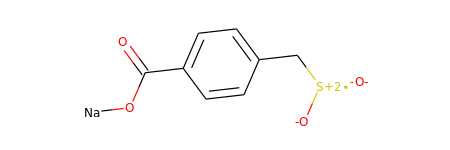

In [19]:
mol = Chem.MolFromSmiles("[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1")
mol

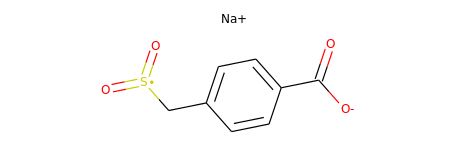

In [20]:
smol = rdMolStandardize.Cleanup(mol)
smol

__rdMolStandardize.Cleanup()__ function can take in an optional __rdMolStandardize.CleanupParameters__ object which you can specify your own standardization reference files to use.
The member variables that you can change are:
-  CleanupParameters.acidbaseFile
-  CleanupParameters.normalizationsFile
-  CleanupParameters.fragmentFile
-  CleanupParameters.maxRestarts
-  CleanupParameters.preferOrganic

In [21]:
params = rdMolStandardize.CleanupParameters()

print("Default acidbaseFile: %s" % params.acidbaseFile)
print("Default normalizationsFile: %s" % params.normalizationsFile)
print("Default fragmentFile: %s" % params.fragmentFile)
print("Default maxRestarts: %s" % params.maxRestarts)
print("Default preferOrganic: %s" % params.preferOrganic)

Default acidbaseFile: /data/dipper/leung/gsoc/rdkit/Data/MolStandardize/acid_base_pairs.txt
Default normalizationsFile: /data/dipper/leung/gsoc/rdkit/Data/MolStandardize/normalizations.txt
Default fragmentFile: /data/dipper/leung/gsoc/rdkit/Data/MolStandardize/fragmentPatterns.txt
Default maxRestarts: 200
Default preferOrganic: False


## rdMolStandardize.Normalize

The __rdMolStandardize.Normalizer__ class is used to apply a series of Normalization transforms to correct functional groups and recombine charges.

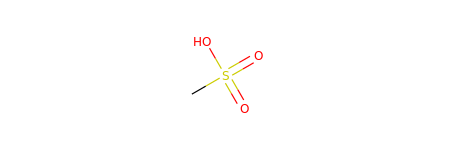

In [22]:
n = rdMolStandardize.Normalizer()
n.normalize(Chem.MolFromSmiles("C[S+2]([O-])([O-])O"))

## rdMolStandardize.MetalDisconnector

The __rdMolStandardize.MetalDisconnector__ class disconnects metal atoms that are defined as covalently bonded to non-metals.

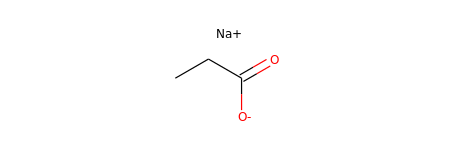

In [23]:
md = rdMolStandardize.MetalDisconnector()
md.Disconnect(Chem.MolFromSmiles("CCC(=O)O[Na]"))

## rdMolStandardize.LargestFragmentChooser and rdMolStandardize.Remover

-  __rdMolStandardize.LargestFragmentChooser__ class gets the largest fragment

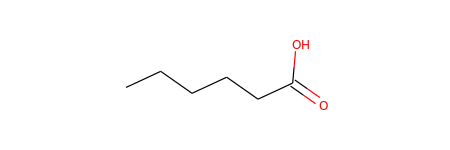

In [24]:
lfc = rdMolStandardize.LargestFragmentChooser()
lfc.choose(Chem.MolFromSmiles("O=C(O)CCC.O=C(O)CCCC.O=C(O)CCCCC.O=C(O)CCCC"))

__rdMolStandardize.FragmentParent()__ function is similar to __rdMolStandardize.LargestFragmentChooser__  but first performs __rdMolStandardize.Cleanup()__

-  __rdMolStandardize.FragmentRemover__ class filters out fragments

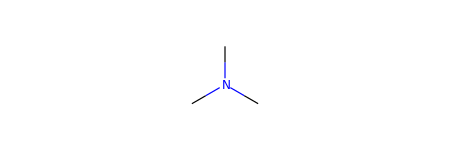

In [25]:
fr = rdMolStandardize.FragmentRemover()
fr.remove(Chem.MolFromSmiles("CN(C)C.Cl.Cl.Br"))

## rdMolStandardize.Reionizer and rdMolStandardizer.Uncharger

-  __rdMolStandardize.Reionizer__ ensure the strongest acid groups ionize first in partially ionized molecules.
-  __rdMolStandardize.Uncharger__ attempts to neutralize charges by adding and/or removing hydrogens where possible.


__rdMolStandardize.ChargeParent()__ method is the uncharged version of the fragment parent. It involves taking the fragment parent then applying __Neutralize__ and __Reionize__.

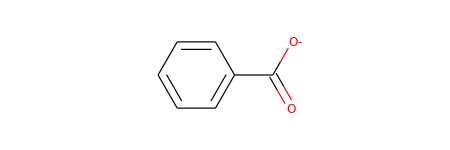

In [26]:
mol = Chem.MolFromSmiles("[Na+].O=C([O-])c1ccccc1")

lfc = rdMolStandardize.LargestFragmentChooser()
mol = lfc.choose(mol)
mol

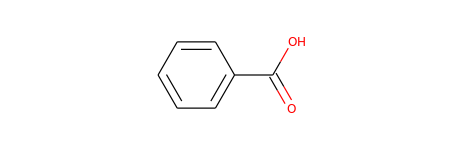

In [27]:
u = rdMolStandardize.Uncharger()
mol = u.uncharge(mol)
mol

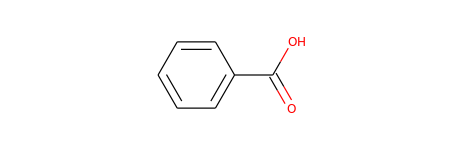

In [28]:
r = rdMolStandardize.Reionizer()
mol = r.reionize(mol)
mol

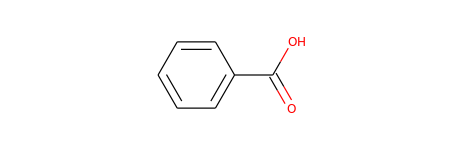

In [29]:
mol = Chem.MolFromSmiles("[Na+].O=C([O-])c1ccccc1")
rdMolStandardize.ChargeParent(mol)

# TODO

##  MolStandardize.tautomer

TODO

-  __Tautomer_enumeration__ generates all possible tautomers using a series of transform rules. It also removes stereochemistry from double bonds that are single in at least 1 tautomer.
-  __Tautomer_canonicalization__ enumerates all possible tautomers using transform rules and uses a scoring system to determine canonical tautomer.

In [30]:
from rdkit.Chem.MolStandardize.standardize import enumerate_tautomers_smiles, canonicalize_tautomer_smiles

In [31]:
enumerate_tautomers_smiles("OC(C)=C(C)C")

{'C=C(O)C(C)C', 'CC(=O)C(C)C', 'CC(C)=C(C)O'}

In [32]:
canonicalize_tautomer_smiles("OC(C)=C(C)C")

'CC(=O)C(C)C'